# Travel Map

Data from gadm.org

In [1]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
from matplotlib import cm, rcParams, path, patches

%matplotlib inline

In [15]:
# Coordinates of Cities
BUD = [47.4925,   19.051389] # Budapest
EDI = [55.953056, -3.188889] # Edinburgh
SOF = [42.7,      23.333333] # Sofia
IST = [41.013611, 28.955]    # Istanbul
PRA = [50.083333, 14.416667] # Prague
BEL = [44.816667, 20.466667] # Belgrade
DRE = [51.033333, 13.733333] # Dresden
BER = [52.516667, 13.383333] # Berlin


# http://colorbrewer2.org/
colours = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
           '#ff7f00', '#ffff33', '#a65628', '#f781bf',
           '#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
           '#ff7f00', '#ffff33', '#a65628', '#f781bf',
           '#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
           '#ff7f00', '#ffff33', '#a65628', '#f781bf',]

In [3]:
def plot_country(nax, country, colour, m, lc='none', lw=1):
    '''Adapted from http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued'''
    r = shapefile.Reader('data/TravelMap/'+country+'_adm/'+country+'_adm0')

    shapes = r.shapes()
    records = r.records()
 
    for record, shape in zip(records,shapes):
        lons,lats = zip(*shape.points)
        data = np.array(m(lons, lats)).T
 
        if len(shape.parts) == 1:
            segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])
 
        lines = LineCollection(segs,antialiaseds=(1,))
        lines.set_facecolors(colour)
        lines.set_edgecolors(lc)
        lines.set_linewidth(lw)
        nax.add_collection(lines)

In [16]:
def plot_arrow(nax, start, end, bmap, ec="k", fc="w", rad=-.3):
    nax.annotate('', bmap(end[1], end[0]), bmap(start[1], start[0]),
                arrowprops=dict(arrowstyle='Fancy, head_length=1, head_width=1, tail_width=.4',
                                alpha=.6,
                                patchA=None,
                                patchB=None,
                                shrinkA=10,
                                shrinkB=10,
                                fc=fc, ec=ec,
                                connectionstyle="arc3, rad="+str(rad),
                                ))


In [5]:
def plot_city(bmap, city, cityname, nax, mfc, color='b', offs=[.1, .1], halign='left'):
    bmap.plot(city[1], city[0], 'o', mfc=mfc, ms=10, mew=2, latlon=True)
    nax.annotate(cityname, bmap(city[1]+offs[0], city[0]+offs[1]),
                 horizontalalignment=halign, color=color, fontsize=20, zorder=10)

## Global Map

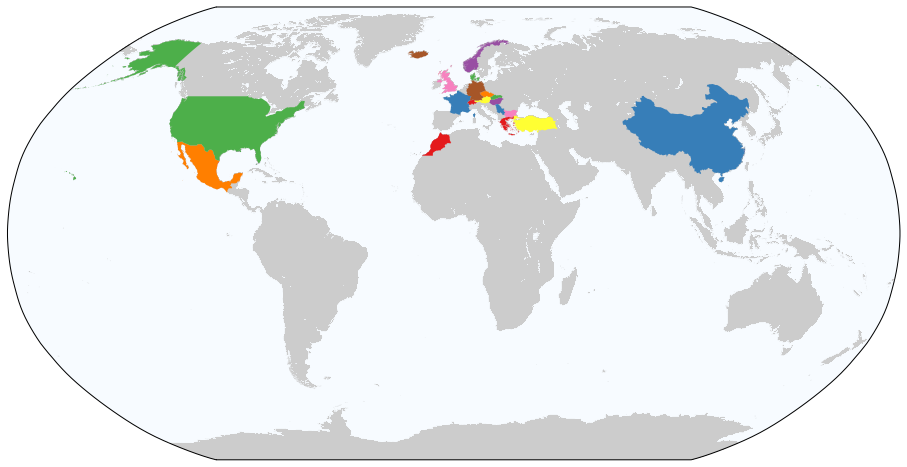

In [6]:
fig_g = plt.figure(1, figsize=(16, 12))
ax_g = plt.subplot(111)

# Create basemap
# resolution: c, l, i, h, f
m_g = Basemap(resolution='i', projection='robin', lon_0=0)
m_g.drawlsmask(land_color='.8', ocean_color='#f7fbff')
m_g.drawcoastlines(color='.8', linewidth=.1)
m_g.drawcountries(color='.8', linewidth=.1)

# Fill visited countries
countries = ['CHE', 'CHN', 'DNK', 'HUN', 'CZE', 'TUR', 'ISL', 'BGR',
             'GRC', 'FRA', 'SVK', 'NOR', 'MEX', 'AUT', 'DEU', 'GBR',
             'MAR', 'SRB', 'USA',]
ii = 0
for i in countries:
    lines = plot_country(ax_g, i, colours[ii], m_g)
    ii += 1

plt.show()

## East Europe Trip

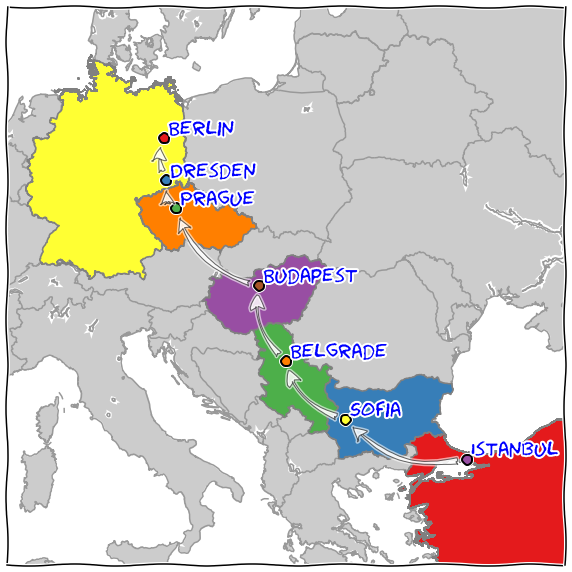

In [17]:
fig_e = plt.figure(figsize=(10, 10))
ax_e = plt.subplot(111)

# Create basemap
# resolution: c, l, i, h, f
m_e = Basemap(width=2200000, height=2200000, resolution='i', projection='tmerc', lat_0=BUD[0], lon_0=BEL[1])
m_e.drawcoastlines(color='.6', linewidth=1.5)
m_e.drawcountries(color='.6', linewidth=1.5)
m_e.fillcontinents(color='.8')

# Fill visited countries
countries = ['TUR', 'BGR', 'SRB', 'HUN', 'CZE', 'DEU',]
ii = 0
for i in countries:
    lines = plot_country(ax_e, i, colours[ii], m_e, '.5', 1.5)
    ii += 1

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_e, IST, 'Istanbul', ax_e, colours[3], offs=[.2, .2])
plot_city(m_e, SOF, 'Sofia', ax_e, colours[5], offs=[.2, .2])
plot_city(m_e, BEL, 'Belgrade', ax_e, colours[4], offs=[.2, .2])
plot_city(m_e, BUD, 'Budapest', ax_e, colours[6], offs=[.2, .2])
plot_city(m_e, PRA, 'Prague', ax_e, colours[2], offs=[.2, .2])
plot_city(m_e, DRE, 'Dresden', ax_e, colours[1], offs=[.2, .2])
plot_city(m_e, BER, 'Berlin', ax_e, colours[0], offs=[.2, .2])

# Connect with arrows
plot_arrow(ax_e, IST, SOF, m_e)
plot_arrow(ax_e, SOF, BEL, m_e)
plot_arrow(ax_e, BEL, BUD, m_e)
plot_arrow(ax_e, BUD, PRA, m_e)
plot_arrow(ax_e, PRA, DRE, m_e)
plot_arrow(ax_e, DRE, BER, m_e)

#plt.savefig('/home/dtr/Desktop/EastEurope.png')
    
plt.show()

## Scotland

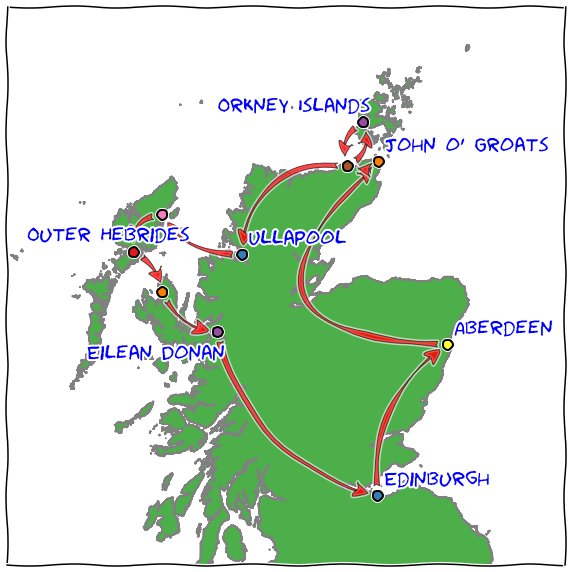

In [19]:
fig_s = plt.figure(figsize=(10, 10))
ax_s = plt.subplot(111)

JOG = [58.64, -3.07] # John o' Groats
ABD = [57.1526, -2.11] # Aberdeen
INV = [57.4718, -4.2254] # Inverness
SCR = [58.609722, -3.5525] # Scrabster
STR = [58.96, -3.3] # Stromness
ULL = [57.9, -5.166] # Ullapool
STO = [58.209, -6.387] # Stornoway
TAR = [57.897749, -6.800595] # Tarbert
UIG = [57.586, -6.357] # Uig
EID = [57.274028, -5.516111] #Eilean Donan

# Create basemap
# resolution: c, l, i, h, f
m_s = Basemap(width=500000, height=500000, resolution='i', projection='tmerc', lat_0=57.65, lon_0=-4.5)
m_s.drawcoastlines(color='.6', linewidth=1.5)
m_s.drawcountries(color='.6', linewidth=1.5)
m_s.fillcontinents(color='.8')

# Fill country
plot_country(ax_s, 'GBR', colours[2], m_s, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_s, EDI, 'Edinburgh', ax_s, colours[1])
plot_city(m_s, ABD, 'Aberdeen', ax_s, colours[5])
plot_city(m_s, JOG, "John o' Groats", ax_s, colours[4])
plot_city(m_s, SCR, '', ax_s, colours[6], halign='right')
plot_city(m_s, STR, 'Orkney Islands', ax_s, colours[3], halign='right')
plot_city(m_s, ULL, 'Ullapool', ax_s, colours[1])
plot_city(m_s, STO, '', ax_s, colours[7])
plot_city(m_s, TAR, 'Outer Hebrides', ax_s, colours[8], offs=[-.4, .1], halign='center')
plot_city(m_s, UIG, '', ax_s, colours[4])
plot_city(m_s, EID, 'Eilean Donan', ax_s, colours[3], offs=[.1, -.2], halign='right')

# Connect with arrows
plot_arrow(ax_s, EDI, ABD, m_s, fc='r')
plot_arrow(ax_s, ABD, JOG, m_s, fc='r', rad=-1.2)
plot_arrow(ax_s, JOG, SCR, m_s, fc='r')
plot_arrow(ax_s, SCR, STR, m_s, fc='r', rad=.4)
plot_arrow(ax_s, STR, SCR, m_s, fc='r', rad=.4)
plot_arrow(ax_s, SCR, ULL, m_s, fc='r', rad=.5)
plot_arrow(ax_s, ULL, STO, m_s, fc='r')
plot_arrow(ax_s, STO, TAR, m_s, fc='r', rad=.5)
plot_arrow(ax_s, TAR, UIG, m_s, fc='r')
plot_arrow(ax_s, UIG, EID, m_s, fc='r', rad=.3)
plot_arrow(ax_s, EID, EDI, m_s, fc='r', rad=.3)

#plt.savefig('/home/dtr/Desktop/Scotland.png')
    
plt.show()

## Norway

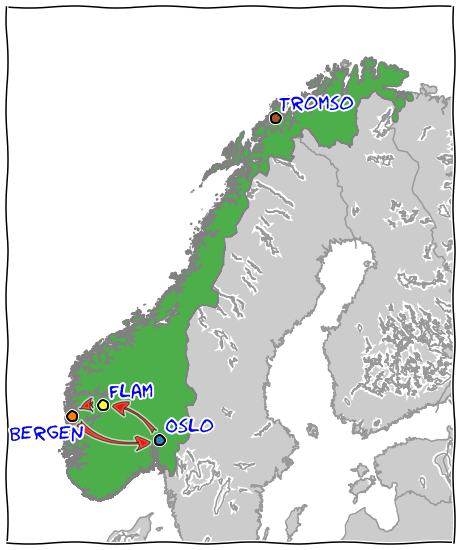

In [20]:
fig_n = plt.figure(figsize=(8, 10))
ax_n = plt.subplot(111)

TRO = [69.682778, 18.942778] # Tromsø
BER = [60.389444, 5.33] # Bergen
FLA = [60.838056, 7.120556] # Flåm
OSL = [59.95, 10.75] # Oslo

# Create basemap
# resolution: c, l, i, h, f
m_n = Basemap(width=1500000, height=1800000, resolution='i', projection='tmerc', lat_0=65, lon_0=15)
m_n.drawcoastlines(color='.6', linewidth=1.5)
m_n.drawcountries(color='.6', linewidth=1.5)
m_n.fillcontinents(color='.8')

# Fill country
plot_country(ax_n, 'NOR', colours[2], m_n, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_n, OSL, 'Oslo', ax_n, colours[1], offs=[.3,.3])
plot_city(m_n, FLA, 'Flam', ax_n, colours[5], offs=[.3,.3])
plot_city(m_n, BER, 'Bergen', ax_n, colours[4], offs=[.8, -.6], halign='right')
plot_city(m_n, TRO, 'Tromso', ax_n, colours[6], offs=[.3,.3])

# Connect with arrows
#plot_arrow(ax_n, OSL, TRO, m_n, fc='r')
#plot_arrow(ax_n, TRO, OSL, m_n, fc='r')
plot_arrow(ax_n, OSL, FLA, m_n, fc='r', rad=.3)
plot_arrow(ax_n, FLA, BER, m_n, fc='r', rad=.3)
plot_arrow(ax_n, BER, OSL, m_n, fc='r', rad=.3)

#plt.savefig('/home/dtr/Desktop/Norway.png')
    
plt.show()

## Paris

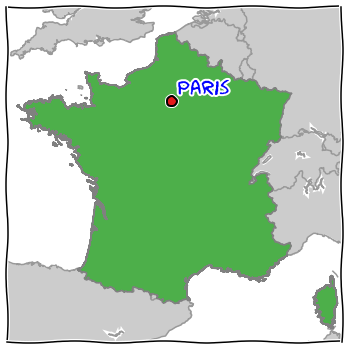

In [21]:
fig_p = plt.figure(figsize=(6, 6))
ax_p = plt.subplot(111)

PAR = [48.8567, 2.3508] # Paris

# Create basemap
# resolution: c, l, i, h, f
m_p = Basemap(width=1200000, height=1200000, resolution='i', projection='tmerc', lat_0=46.5, lon_0=2.5)
m_p.drawcoastlines(color='.6', linewidth=1.5)
m_p.drawcountries(color='.6', linewidth=1.5)
m_p.fillcontinents(color='.8')

# Fill country
plot_country(ax_p, 'FRA', colours[2], m_p, '.5', 1.5)

# XKCDify 
plt.xkcd()

# Add visited cities
plot_city(m_p, PAR, 'Paris', ax_p, colours[0], offs=[.3,.3])

#plt.savefig('/home/dtr/Desktop/Paris.png')
    
plt.show()

## Vegas

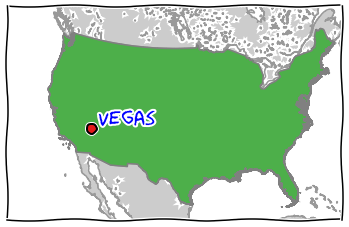

In [22]:
fig_v = plt.figure(figsize=(6, 4))
ax_v = plt.subplot(111)

VEG = [36.175, -115.136389] # Vegas

# Create basemap
# resolution: c, l, i, h, f
m_v = Basemap(width=5500000, height=3500000, resolution='i', projection='tmerc', lat_0=39.5, lon_0=-100)
m_v.drawcoastlines(color='.6', linewidth=1.5)
m_v.drawcountries(color='.6', linewidth=1.5)
m_v.fillcontinents(color='.8')

# Fill country
plot_country(ax_v, 'USA', colours[2], m_v, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_v, VEG, 'Vegas', ax_v, colours[0], offs=[1,1])

#plt.savefig('/home/dtr/Desktop/Vegas.png')
    
plt.show()

## Beijing

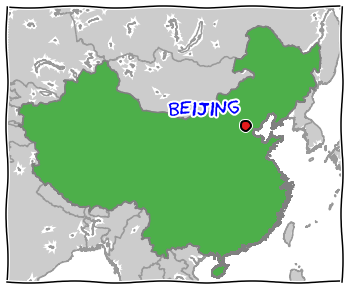

In [23]:
fig_b = plt.figure(figsize=(6, 5))
ax_b = plt.subplot(111)

BEI = [39.916667, 116.383333] # Beijing

# Create basemap
# resolution: c, l, i, h, f
m_b = Basemap(width=5500000, height=4500000, resolution='i', projection='tmerc', lat_0=38, lon_0=103)
m_b.drawcoastlines(color='.6', linewidth=1.5)
m_b.drawcountries(color='.6', linewidth=1.5)
m_b.fillcontinents(color='.8')

# Fill country
plot_country(ax_b, 'CHN', colours[2], m_b, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_b, BEI, 'Beijing', ax_b, colours[0], offs=[-1,2], halign='right')

#plt.savefig('/home/dtr/Desktop/Beijing.png')
    
plt.show()

## Austria / Slovakia

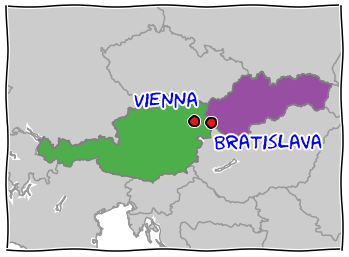

In [36]:
fig_a = plt.figure(figsize=(6, 4.5))
ax_a = plt.subplot(111)

VIE = [48.2, 16.366667] # Vienna
BRA = [48.143889, 17.109722] # Bratislava

# Create basemap
# resolution: c, l, i, h, f
m_a = Basemap(width=1100000, height=800000, resolution='i', projection='tmerc', lat_0=48, lon_0=15.5)
m_a.drawcoastlines(color='.6', linewidth=1.5)
m_a.drawcountries(color='.6', linewidth=1.5)
m_a.fillcontinents(color='.8')

# Fill country
plot_country(ax_a, 'AUT', colours[2], m_a, '.5', 1.5)
plot_country(ax_a, 'SVK', colours[3], m_a, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_a, VIE, 'Vienna', ax_a, colours[0], offs=[.1,.5], halign='right')
plot_city(m_a, BRA, 'Bratislava', ax_a, colours[0], offs=[.1,-.7])

#plt.savefig('/home/dtr/Desktop/AustriaSlovakia.png')
    
plt.show()

## Morocco

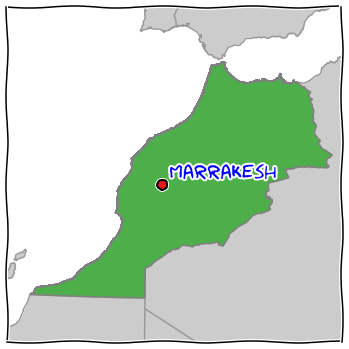

In [44]:
fig_m = plt.figure(figsize=(6, 6))
ax_m = plt.subplot(111)

MAR = [31.63, -8.008889] # Marrakesh

# Create basemap
# resolution: c, l, i, h, f
m_m = Basemap(width=1300000, height=1300000, resolution='i', projection='tmerc', lat_0=32, lon_0=-7.5)
m_m.drawcoastlines(color='.6', linewidth=1.5)
m_m.drawcountries(color='.6', linewidth=1.5)
m_m.fillcontinents(color='.8')

# Fill country
plot_country(ax_m, 'MAR', colours[2], m_m, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_m, MAR, 'Marrakesh', ax_m, colours[0], offs=[.3,.3])

#plt.savefig('/home/dtr/Desktop/Marrakesh.png')
    
plt.show()

## Denmark

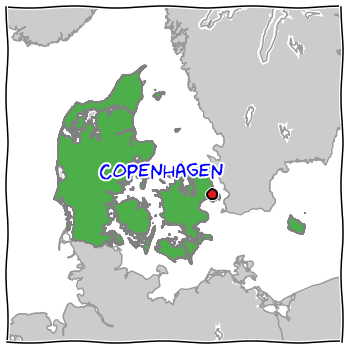

In [54]:
fig_d = plt.figure(figsize=(6, 6))
ax_d = plt.subplot(111)

COP = [55.676111, 12.568333] # Copenhagen

# Create basemap
# resolution: c, l, i, h, f
m_d = Basemap(width=600000, height=600000, resolution='i', projection='tmerc', lat_0=56, lon_0=11.5)
m_d.drawcoastlines(color='.6', linewidth=1.5)
m_d.drawcountries(color='.6', linewidth=1.5)
m_d.fillcontinents(color='.8')

# Fill country
plot_country(ax_d, 'DNK', colours[2], m_d, '.5', 1.5)

# XKCDify
plt.xkcd()

# Add visited cities
plot_city(m_d, COP, 'Copenhagen', ax_d, colours[0], offs=[.3,.3], halign='right')

#plt.savefig('/home/dtr/Desktop/Copenhagen.png')
    
plt.show()

## Mexico

## Switzerland

## Iceland

## UK